In [1]:
### Getting the system ready and loading the dataset

### loading the required packages
import pandas as pd
import numpy as np ## for mathematical calculations
import seaborn as sns ## for data visualization
import matplotlib.pyplot as plt ## for plotting graphs
%matplotlib inline
import warnings ## to ignore warnings
warnings.filterwarnings("ignore")

In [2]:
### reading the data
train=pd.read_csv("D:/Vibhor/loan prediction practice problem/train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("D:/Vibhor/loan prediction practice problem/test_Y3wMUE5_7gLdaTN.csv")

In [3]:
### Let's make a copy of train and test datasets
train_original=train.copy()
test_original=test.copy()

In [4]:
### Understanding the data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
### print the datatype for each variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
### shape of the dataset
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
### Univariate analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#### Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

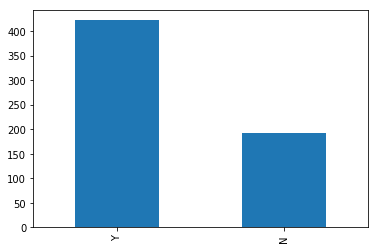

In [10]:
train['Loan_Status'].value_counts().plot.bar()

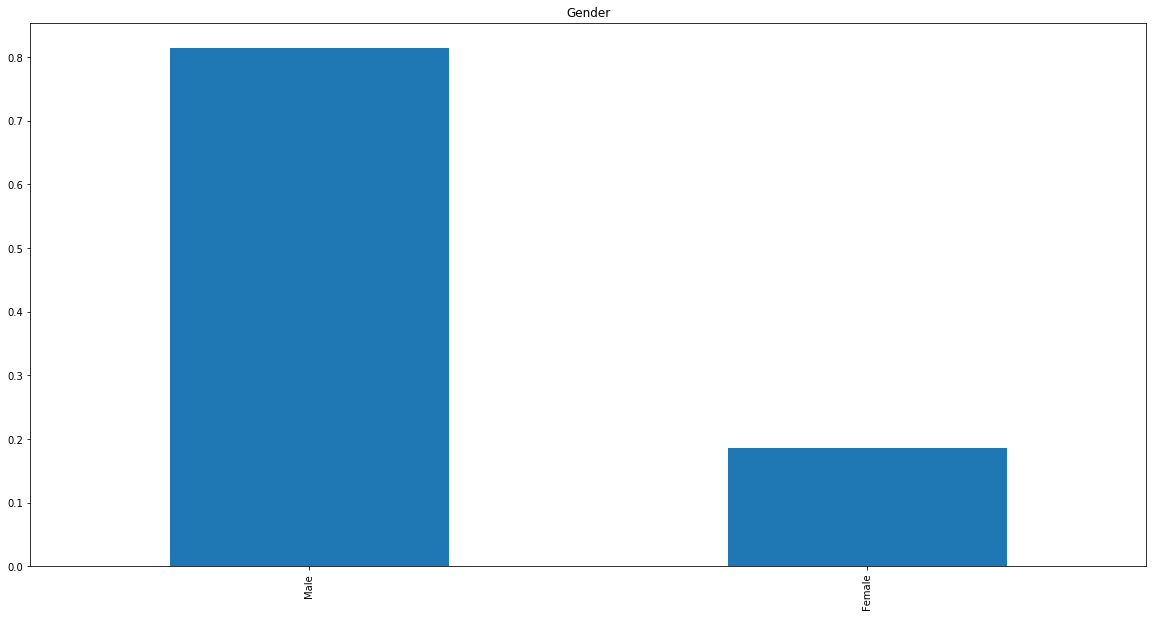

In [11]:
### visualizing the categorical,ordinal and numerical features.Independent variable(categorical)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

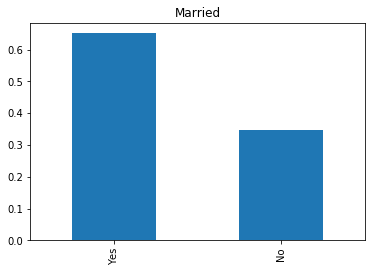

In [12]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

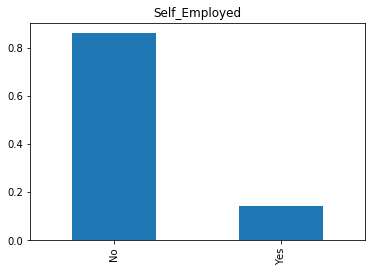

In [13]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

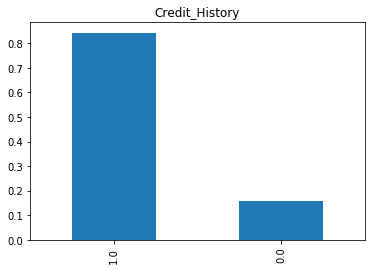

In [14]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

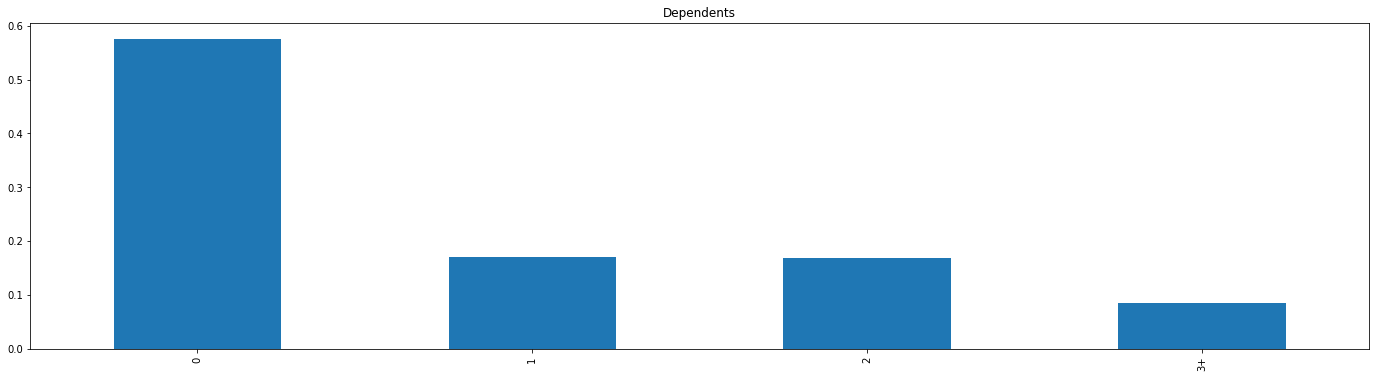

In [15]:
### visualizing the categorical,ordinal and numerical features.Independent variable(ordinal)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

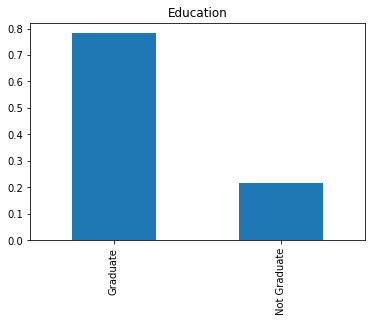

In [16]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

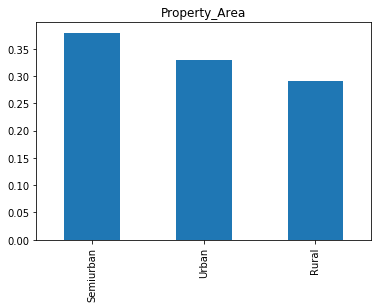

In [17]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

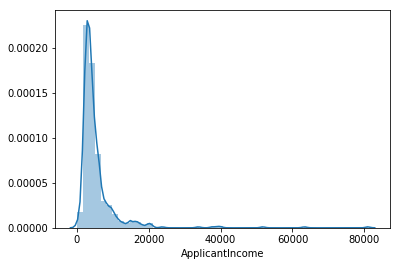

In [18]:
### visualizing the categorical,ordinal and numerical features.Independent variable(numerical)
sns.distplot(train['ApplicantIncome']);

### it can be inferred that most of the data in distribution of applicant income is skewed towards left which means it is not 
### normally distributed

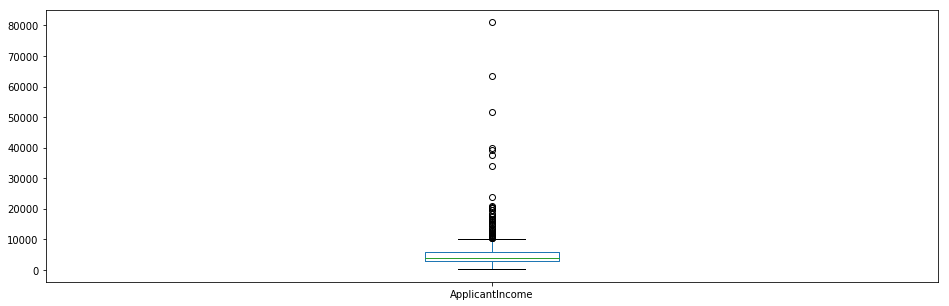

In [19]:
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

### the boxplot confirms the presence of a lot of outliers/extreme values which might be probably due to income disparity in 
### the society. Part of this can be driven by the fact that we are looking at people with different education levels. 
### Let us segregate them by education.


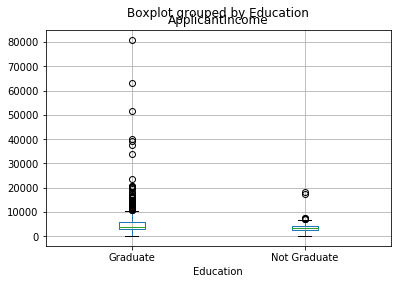

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Education')
### there are higher number of graduates with very high incomes,which are appearing to be outliers

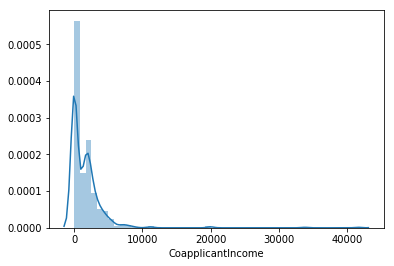

In [21]:
### Let's look at the coapplicant income distribution
sns.distplot(train['CoapplicantIncome'])

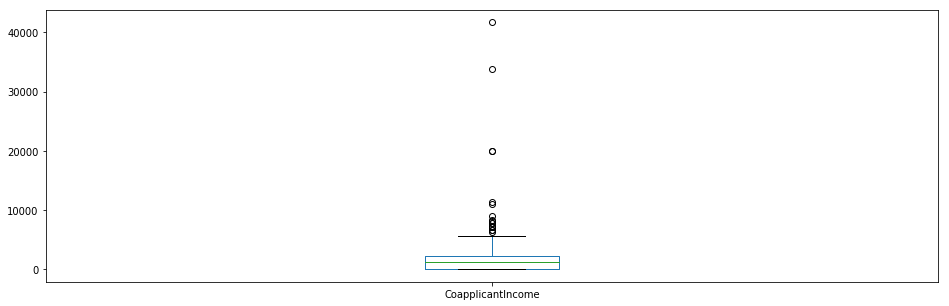

In [22]:
train['CoapplicantIncome'].plot.box(figsize=(16,5))
### we see a similar distribution as that of the applicant income. Majority of the coapplicant's income ranges from 0-5k.
### we also see a lot outliers in the coapplicant income which is not normally distributed.

In [23]:
### Let's look at the distribution of loan amount variable
df = train.dropna()

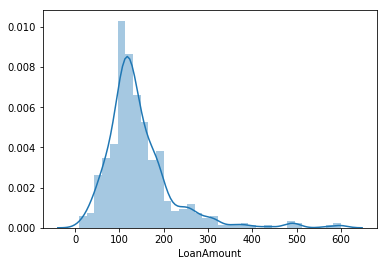

In [24]:
sns.distplot(df['LoanAmount'])

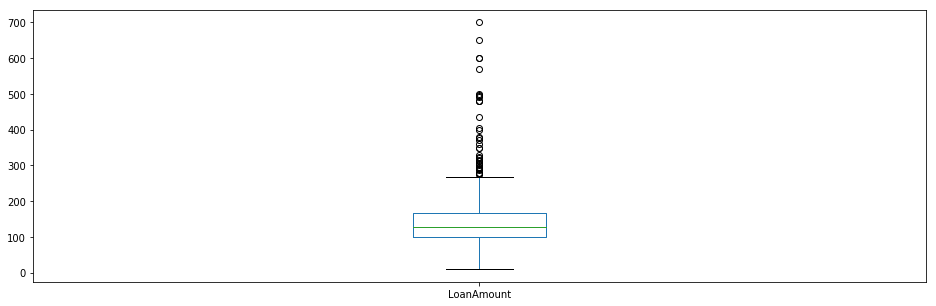

In [25]:
train['LoanAmount'].plot.box(figsize=(16,5))

In [26]:
### we see a lot of outliers in this variable and the distribution is fairly normal as well
### Now we would like to know how well each feature correlate with loan status. So let's perform bivariate analysis.

In [27]:
### Bivariate Analysis.Categorical independent variable vs target variable
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])

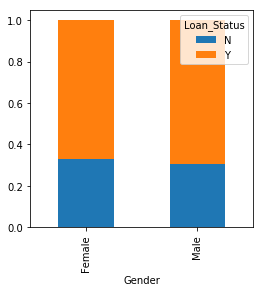

In [28]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [29]:
### it can be inferred that the proportion of male and female applicants is more or less same for both approved 
### and unapproved loans
### Now let us visualize the remaining categorical variables vs target variable
Married=pd.crosstab(train['Married'],train['Loan_Status'])

In [30]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

In [31]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])

In [32]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

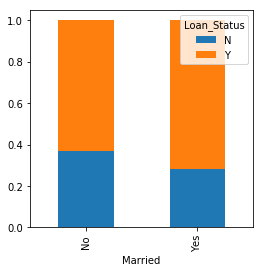

In [33]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

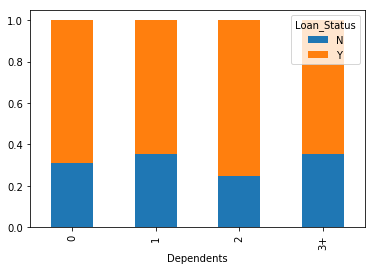

In [34]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

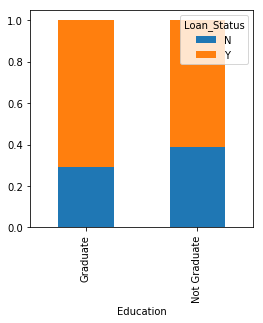

In [35]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

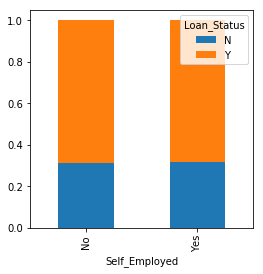

In [36]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [37]:
### proportion of married applicants is higher for approved loans
### distribution of applicants with 1 or 3+ dependents is similar across both the categories of loan status
### there is nothing significant that can be inferred from self_employed vs loan_status plot

### lets look at the relationship between remaining categorical independent variable and loan_Status
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

In [38]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

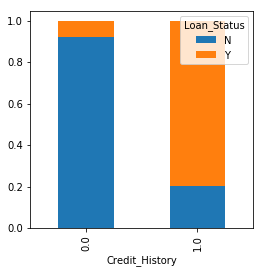

In [39]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

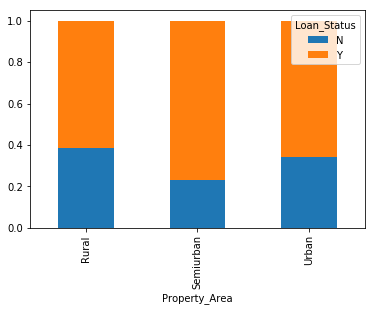

In [40]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)

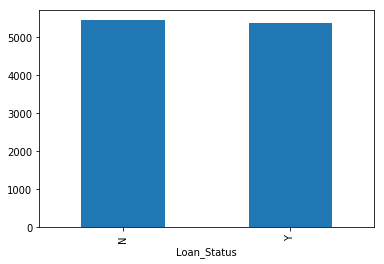

In [41]:
### it looks like people with credit history 1 are more likely to get their loans approved.
### proportion of loans getting approved in semi urban areas is higher as compared to that in rural and urban areas

### Now lets visualize numerical independent variable vs target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [42]:
### Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. 
### So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status 
### for each bin.

bins=[0,2500,4000,6000,81000]

In [43]:
group=['Low','Average','High','Very High']

In [44]:
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

In [45]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

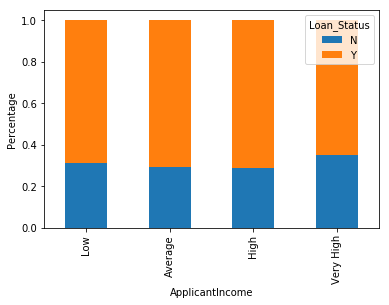

In [46]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [47]:
### it can be inferred that applicant income does not affect the chances of loan approval which contradicts our hypothesis 
### where in we assumed that if applicant income is high the chances of loan approval will also be high.

### similarly analysing the coapplicant income and loan amount variable
bins=[0,1000,3000,42000]

In [48]:
group=['Low','Average','High']

In [49]:
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [50]:
Coapplicant_Income_bin=pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])

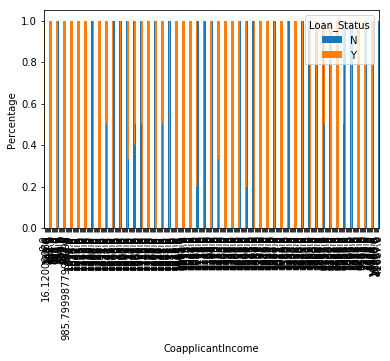

In [51]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [52]:
### it shows that if coapplicant's income is less the chances of loan approval are high.

### Lets combine the applicant and coapplicant income and see the combined effect of total income on the loan status
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

In [53]:
bins=[0,2500,4000,6000,81000]

In [54]:
group=['Low','Average','High','Very High']

In [55]:
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

In [56]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])

Text(0,0.5,'Percentage')

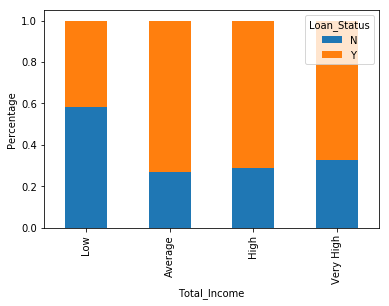

In [57]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [58]:
### we can see that the proportion of loans getting approved for applicants having low total income is very less compared to 
### that of applicants with avg,high and very high.
### lets visualise the loan amount variable

bins=[0,100,200,700]

In [59]:
group=['Low','Average','High']

In [60]:
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

In [61]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

Text(0,0.5,'Percentage')

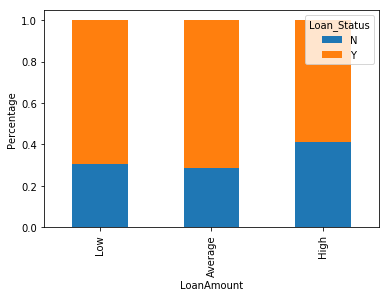

In [62]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [63]:
### it can be seen that the proportion of approved loans is higher for low and avg as compared to that of high loan amt which 
### supports our hypothesis where in we considered that the chances of loan approval will be high when the loan amount is less.

### Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it 
### a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation 
### with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. 
### We will replace N with 0 and Y with 1.

train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [64]:
train['Dependents'].replace('3+',3,inplace=True)

In [65]:
test['Dependents'].replace('3+',3,inplace=True)

In [66]:
train['Loan_Status'].replace('N',0,inplace=True)

In [67]:
train['Loan_Status'].replace('Y',1,inplace=True)

In [68]:
### Now lets look at the correlation between all the numerical variables. 
### We will use the heat map to visualize the correlation. 
### Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

matrix = train.corr()

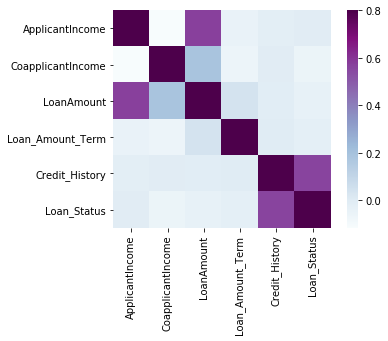

In [69]:
ax = sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [70]:
### we can see that most correlated variables are (ApplicantIncome-loan amount) and (Credit_History-loan status).
### Loan amount is also correlated with coapplicant income.

### missing value and outlier treatment. Missing values imputation. Let's list out feature-wise count of missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
### there are very less missing values in gender,married,dependents,credit history and self employed so we can fill them 
## using the mode of the features
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [72]:
### now lets try to find a way to fill the missing values in loan amount term.
## We will look at the value count of the loan amount term variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [73]:
### it can be seen that in loan amount term variable,the value of 360 is repeating the most. 
### So we will replace the missing values in this variable using the mode of this variable

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [74]:
### now we will see the LoanAmount variable.
### as it is a numerical variable, we can use mean or median to impute the missing values.
### we will use median to impute the null values as earlier we saw that loan amount have outliers
### so the mean will not be the proper approach as it is highly affected by the presence of outliers.

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [75]:
### now lets check whether all the missing values are imputed in the dataset.
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
### Lets fill all the missing values in the test dataset too, with the same approach. Check the missing values in test dataset.
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [77]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

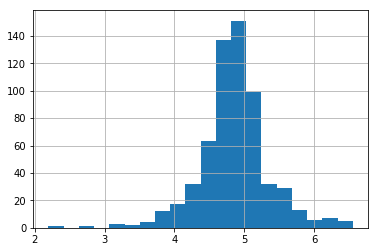

In [78]:
### outlier treatment
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [79]:
### now the distribution looks much closer to the normal and effect of extreme values has been significantly subsided.

### Model Building Part-1:Logistic Regression
### Lets drop the Loan_ID variable as it do not have any effect on the loan status. 
### We will do the same changes to the test dataset which we did for the training dataset

train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [80]:
### We will use scikit-learn (sklearn) for making different models which is an open source library for Python. 
### It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.
### Sklearn requires the target variable in a separate dataset. 
### So, we will drop our target variable from the train dataset and save it in another dataset.

X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [81]:
### Creating dummy variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [82]:
## divide the train dataset into train and validation.Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [84]:
### the dataset has been divided into training and validation part.
### Let us import the logistic regression and accuracy_score from sklearn and fit the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',
                   n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='12', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
### Let us predict the loan_status for validation set and calculate its accuracy
pred_cv=model.predict(x_cv)

In [86]:
### Let us calculate how accurate our predictions are by calculating the accuracy
accuracy_score(y_cv,pred_cv)

0.8

In [87]:
### Our predictions are almost 80% accurate.i.e we have identified 80% of the loan status correctly.
### Let us make predictions for the test dataset
pred_test = model.predict(test)

In [88]:
### Let's import the submission file which we have to submit on the solution checker.
submission=pd.read_csv("D:/Vibhor/loan prediction practice problem/Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [89]:
### We only need the Loan_ID and the corresponding Loan_Status for the final submission.
### We will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [90]:
### we need predictions in Y and N. So lets convert 1 and 0 to Y and N.
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [91]:
### Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission,columns=['Loan_ID,Loan_Status']).to_csv('Logistic.csv')

In [92]:
### Logistic Regression using stratified k-folds cross validation. Let us import the stratifiedKFold from sk learn and fit the model
from sklearn.model_selection import StratifiedKFold

In [93]:
### Now lets make a cross validation logistic model with stratified 5 folds and make predictions for the test dataset.
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
   
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [94]:
from sklearn import metrics

In [95]:
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)

In [96]:
 plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

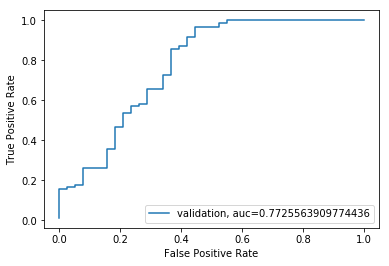

In [97]:
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

In [98]:
### We got an AUC curve of 0.77
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [99]:
### We need to make predictions in Y and N. So let's convert Y and N to 1 and 0 respectively
submission['Loan_Status'].replace(0,'N',inplace = True)
submission['Loan_Status'].replace(1,'Y',inplace = True)

In [100]:
### Lets convert the submission to .csv format and make submission to check accuracy on the leaderboard.
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [101]:
### Feature Engineering
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

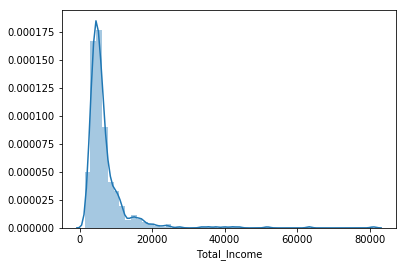

In [102]:
### Lets check the distribution of total income
sns.distplot(train['Total_Income']);

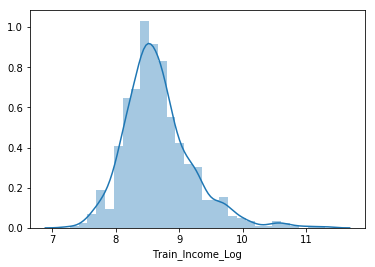

In [103]:
### We can see that the distribution is skewed towards left i.e the distribution is right skewed.
### let's take the log transformation to make the distribution normal

train['Train_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Train_Income_Log']);
test['Test_Income_Log'] = np.log(test['Total_Income'])

In [104]:
### Now the distribution looks much normal and effect of extreme values has been subsided significantly.
### Lets create the EMI feature now.

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']


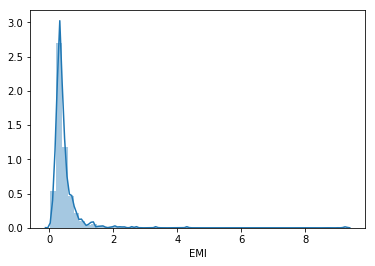

In [105]:
### Lets check the distribution of EMI variable
sns.distplot(train['EMI'])

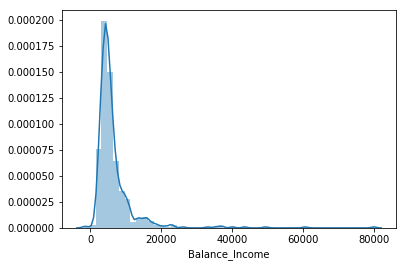

In [106]:
### Lets create balance income feature now and check its distribution
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)
sns.distplot(train['Balance_Income']);

In [107]:
### Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation
### between old features and these new features will be very high and logistic regression assumes that the variables are not
### highly correlated. Removing correlated features will help in reducing the noise too.

train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)

In [108]:
### Lets prepare the data for feeding into models
X = train.drop('Loan_Status',1)
y = train.Loan_Status ### Saving the target variable in a separate dataset

In [109]:
### Logistic Regression
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541


In [110]:
### mean validation accuracy of this model is 0.812
submission['Loan_Status'] = pred_test ## filling loan_status with predictions
submission['Loan_ID'] = test_original['Loan_ID'] ## filling loan_ID with test loan_ID

### replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0,'N',inplace = True)
submission['Loan_Status'].replace(1,'Y',inplace = True)

### Converting submission file to .csv format
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('Log2.csv')